# Filtro Sobel

,versão,tempo_de_execução_s
0,naive,4.318750
1,o3,1.090910
2,unroll,0.208338
3,avx512f,0.197168


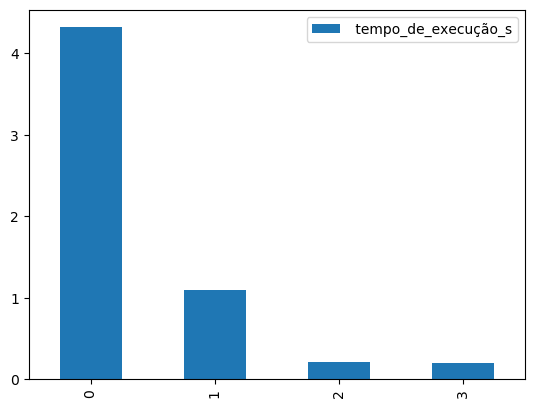

In [6]:
# Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz
import pandas as pd
import numpy

df = pd.read_csv('data.csv')
plt = df.plot(kind="bar")
df

In [33]:
%%writefile lab/sobel.cpp
/**
* @file image_sobel.c
* @brief C program to convert an image to grayscale
* @author Ricardo Menotti
* @version v1
* @date 2022-09-14
*/
#include <stdio.h>
#include <time.h>
#include <math.h>
#include <bits/stdc++.h>

using namespace std;
using namespace std::chrono;
        
int main()
{
  auto now = high_resolution_clock::now();
  FILE *fIn = fopen("arara.bmp","r");      // Input File name
  FILE *fOut = fopen("arara_sobel.bmp","w+");          // Output File name

  int i,j,y, x;
  unsigned char byte[54];

  if(fIn==NULL)              // check if the input file has not been opened succesfully.
  {                      
    printf("File does not exist.\n");
  }

  for(i=0;i<54;i++)            // read the 54 byte header from fIn
  {                  
    byte[i] = getc(fIn);                
  }

  fwrite(byte,sizeof(unsigned char),54,fOut);      // write the header back

  // extract image height, width and bitDepth from imageHeader 
  int height = *(int*)&byte[18];
  int width = *(int*)&byte[22];
  int bitDepth = *(int*)&byte[28];

  printf("width: %d\n",width);
  printf("height: %d\n",height );

  int size = height*width;          // calculate the image size

  unsigned char buffer[size][3];          // store the input image data
  unsigned char bufg[size][3];          // store the grayscale image data
  unsigned char out[size][3];          // store the output image data
  unsigned char r, g, b;
  unsigned int gray;

  for(i=0;i<size;i++)            // read image data character by character
  {
    buffer[i][2]=getc(fIn);          // blue
    buffer[i][1]=getc(fIn);          // green
    buffer[i][0]=getc(fIn);          // red
  }

  for(i=0;i<size;i++)           // convert image data character by character
  {
    b=buffer[i][2];          // blue
    g=buffer[i][1];          // green
    r=buffer[i][0];          // red
    gray=(r+(g<<1)+b)>>2;
    bufg[i][2]=(unsigned char)gray; 
    bufg[i][1]=(unsigned char)gray;
    bufg[i][0]=(unsigned char)gray;
  }





    int pixel_x;
    int pixel_y;

    float sobel_x[3][3] =
    { { -1, 0, 1 },
      { -2, 0, 2 },
      { -1, 0, 1 } };

    float sobel_y[3][3] =
    { { -1, -2, -1 },
      { 0,  0,  0 },
      { 1,  2,  1 } };

    for (int x=1; x < width-1; x++)
    {
        for (int y=1; y < height-1; y++)
        {

            pixel_x = (sobel_x[0][0] * bufg[width * (y-1) + (x-1)][0])
                    + (sobel_x[0][1] * bufg[width * (y-1) +  x   ][0])
                    + (sobel_x[0][2] * bufg[width * (y-1) + (x+1)][0])
                    + (sobel_x[1][0] * bufg[width *  y    + (x-1)][0])
                    + (sobel_x[1][1] * bufg[width *  y    +  x   ][0])
                    + (sobel_x[1][2] * bufg[width *  y    + (x+1)][0])
                    + (sobel_x[2][0] * bufg[width * (y+1) + (x-1)][0])
                    + (sobel_x[2][1] * bufg[width * (y+1) +  x   ][0])
                    + (sobel_x[2][2] * bufg[width * (y+1) + (x+1)][0]);

            pixel_y = (sobel_y[0][0] * bufg[width * (y-1) + (x-1)][0])
                    + (sobel_y[0][1] * bufg[width * (y-1) +  x   ][0])
                    + (sobel_y[0][2] * bufg[width * (y-1) + (x+1)][0])
                    + (sobel_y[1][0] * bufg[width *  y    + (x-1)][0])
                    + (sobel_y[1][1] * bufg[width *  y    +  x   ][0])
                    + (sobel_y[1][2] * bufg[width *  y    + (x+1)][0])
                    + (sobel_y[2][0] * bufg[width * (y+1) + (x-1)][0])
                    + (sobel_y[2][1] * bufg[width * (y+1) +  x   ][0])
                    + (sobel_y[2][2] * bufg[width * (y+1) + (x+1)][0]);

            int val = (int)sqrt((pixel_x * pixel_x) + (pixel_y * pixel_y));

            if(val < 0) val = 0;
            if(val > 255) val = 255;

            out[height * y + x][2] = (unsigned char)val;
            out[height * y + x][1] = (unsigned char)val;
            out[height * y + x][0] = (unsigned char)val;
        }
    }






  for(i=0;i<size;i++)            //write image data back to the file
  {
    putc(out[i][2],fOut);
    putc(out[i][1],fOut);
    putc(out[i][0],fOut);
  }
    
  fclose(fOut);
  fclose(fIn);

  auto end_time = duration_cast<duration<double>>(high_resolution_clock::now() - now).count();
  cout << "Time used: "<< end_time << "s" << endl;
  return 0;
}

Overwriting lab/sobel.cpp


In [34]:
!dpcpp -o bin/sobel lab/sobel.cpp && bin/sobel 

width: 1200
height: 1600


<table>
    <tr>
        <td><img src="lena_color.bmp" width="100%" /></td>
        <td><img src="lena_sobel.bmp" width="100%" /></td>
    </tr>
</table>

<table>
    <tr>
        <td><img src="arara.bmp" width="100%" /></td>
        <td><img src="arara_sobel.bmp" width="100%" /></td>
    </tr>
</table>

## Referências
- https://www.oneapi.io/
